# Single Perceptron Learning Algorithm
## Objectives
- Implement the Single Perceptron Learning Algorithm using NumPy in Python.
- Evaluate the performance of a single perceptron for **NAND** and **XOR** truth tables.
- Use the **Step Function** as the activation function.
- Visualize the **Confusion Matrix**.


## Description of the Model
A **Perceptron** is a type of artificial neuron that mimics a biological neuron. It consists of:
- **Inputs (X)**
- **Weights (W)**
- **Bias (b)**
- **Activation Function (Step Function)**
- **Output (Y)**

The perceptron updates its weights using the **Perceptron Learning Rule**, which adjusts based on errors in classification.

**Key Points:**
- The perceptron works **only for linearly separable problems** like NAND.
- It **fails** for non-linearly separable problems like XOR.
The perceptron is a simple linear classifier that uses weights and biases to make predictions based on input data. It follows these steps:
1. Compute weighted sum of inputs.
2. Apply a step activation function.
3. Update weights using learning rate and error correction.
4. Repeat for multiple epochs.

**Note:** A single-layer perceptron **cannot** solve the XOR problem due to non-linearity.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Step Activation Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Perceptron Training Function
def perceptron_train(X, y, epochs=10, lr=0.1):
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    bias = 0

    for _ in range(epochs):
        for i in range(len(X)):
            weighted_sum = np.dot(X[i], weights) + bias
            y_pred = step_function(weighted_sum)
            error = y[i] - y_pred

            # Update weights and bias
            weights += lr * error * X[i]
            bias += lr * error

    return weights, bias

# Perceptron Prediction Function
def perceptron_predict(X, weights, bias):
    weighted_sum = np.dot(X, weights) + bias
    return step_function(weighted_sum)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()


## NAND Perceptron Implementation

NAND Perceptron Accuracy: 1.0


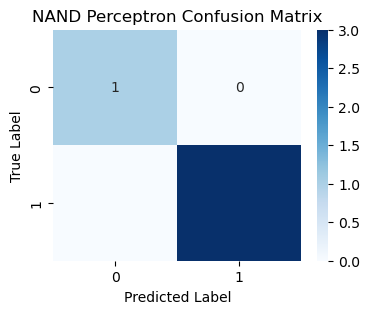

In [2]:

# NAND Dataset
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_nand = np.array([1, 1, 1, 0])  # NAND output

# Train NAND Perceptron
weights_nand, bias_nand = perceptron_train(X_nand, y_nand)

# Predict and Evaluate NAND
y_pred_nand = perceptron_predict(X_nand, weights_nand, bias_nand)
accuracy_nand = accuracy_score(y_nand, y_pred_nand)

print("NAND Perceptron Accuracy:", accuracy_nand)
plot_confusion_matrix(y_nand, y_pred_nand, title="NAND Perceptron Confusion Matrix")


## XOR Perceptron Implementation (Fails due to Linearity)

XOR Perceptron Accuracy: 0.5


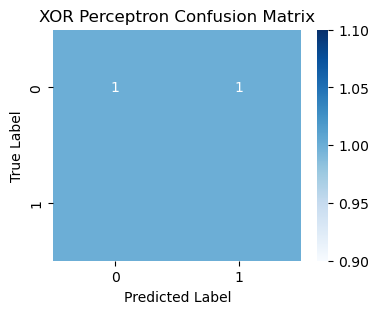

In [3]:

# XOR Dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR output

# Train XOR Perceptron
weights_xor, bias_xor = perceptron_train(X_xor, y_xor)

# Predict and Evaluate XOR
y_pred_xor = perceptron_predict(X_xor, weights_xor, bias_xor)
accuracy_xor = accuracy_score(y_xor, y_pred_xor)

print("XOR Perceptron Accuracy:", accuracy_xor)
plot_confusion_matrix(y_xor, y_pred_xor, title="XOR Perceptron Confusion Matrix")


## Performance Evaluation
- **Confusion Matrix** is used to visualize classification performance.
- **Accuracy** metric shows correct predictions.

**Observations:**
- The perceptron successfully classifies NAND with 100% accuracy.
- The perceptron fails for XOR due to its inability to handle non-linearly separable data.


## My Comments (Limitations & Improvements)
- The single-layer perceptron **cannot** classify XOR correctly.
- To solve XOR, a **multi-layer perceptron (MLP) with a hidden layer** is required.
- **Activation functions like ReLU or Sigmoid** can improve learning in non-linear problems.
- A perceptron is best suited for **linearly separable data**.
